In [61]:
!pip install "keras"
!pip install "Pillow"
!pip install --upgrade "scipy"
!pip3 install "h5py"


Requirement already up-to-date: scipy in /Users/jonny/anaconda3/lib/python3.7/site-packages (1.3.3)
     |████████████████████████████████| 3.0MB 4.3MB/s eta 0:00:01
     |████████████████████████████████| 15.1MB 10.4MB/s eta 0:00:01


In [24]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
#train_x = train_x.astype('float32') / 255
#test_x = test_x.astype('float32') / 255
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_x,train_y,batch_size=32,epochs=10,verbose=1)
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 1.0717 - accuracy: 0.8519
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.2797 - accuracy: 0.9244
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1996 - accuracy: 0.9423
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1573 - accuracy: 0.9537
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1316 - accuracy: 0.9603
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1109 - accuracy: 0.9660
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0945 - accuracy: 0.9711
Epoch 8/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0829 - accuracy: 0.9752
Epoch 9/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0731 - accuracy: 0.9776
Epoch

In [14]:
model.save("./../../build/digit-model.h5", include_optimizer=False)

Class:  5


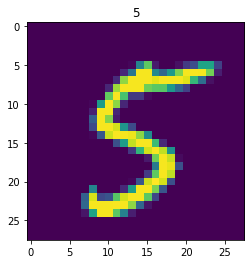

In [36]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.load_weights("./../../build/digit-model.h5")
img = test_x[129]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

Class:  6


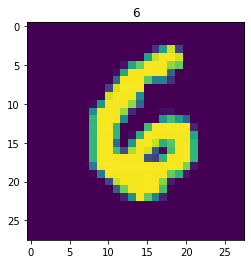

In [8]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.load_weights("digit-model.h5")
img = test_x[130]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

Class:  3


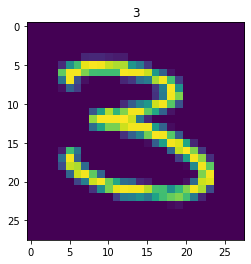

In [9]:
from keras.preprocessing import image

img = image.load_img(path="test3.png",grayscale=True,target_size=(28,28,1))
img = image.img_to_array(img)
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()